### This notebook is loading a few different Antarctic Polar Vortex indexes and creating time series to be analysed with the moorings later on. 

#### I use 2 different indexes that are in a table on the Datasets folder. 
#### - Stratospheric-Tropospheric Couple Mode (Lim et al. 2018); refer to https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2018JD029321
#### - JRA55-derived index;	calculated from JRA-55 reanalysis using mean zonal winds at 60S and 10hPa using climatology of 1981-2018.
#### - Breakdown Index: 
##### From Black & McDaniel 2006 "The stratospheric polar vortex is characterized by an annual cycle that terminates with a relatively rapid breakdown known as the stratospheric final warming (SFW), which typically occurs during spring. However, considerable interannual variability in the timing of SFW events is observed (e.g., Waugh and Rong 2002) since they are initiated by transient Rossby wave packets propagating upward from tropospheric altitudes. This raises the intriguing scientific question of whether SFW events provide an organizing influence on the stratosphere–troposphere circulation akin to the annular mode behavior described above. For example, are early polar vortex breakdowns accompanied by parallel anomalous weakenings in the tropospheric westerlies near 55°N? The existence of such behavior will have a particular bearing upon the understanding, simulation, and prediction of extratropical seasonal transitions as well as interannual circulation variability.

#### First we import the packages we will need. 

In [47]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Read the excell file that contains the indexes on the folder Datasets on this repo. 

In [6]:
file_path = '/home/jovyan/ohw23_proj_SAupwelling/Datasets/Vortex_datasets.csv'
data = pd.read_csv(file_path)

file_path2 = '/home/jovyan/ohw23_proj_SAupwelling/Datasets/anom.BDdates.1979-2016.csv'
data2 = pd.read_csv(file_path2)

#### Explore the data: Once you've read the Excel file, the data will be stored in a DataFrame. You can now use various pandas functions to explore and manipulate the data. For example, you can display the first few rows of the DataFrame using the head() function:

In [40]:
data


,Year,S-Tmode_Lim_et_al_2018,Sep-Nov[U]_60S10hPa_JRA55
0,1979.0,0.888418,-5.539120
1,1980.0,-0.351454,4.054700
2,1981.0,-0.797533,4.123391
3,1982.0,0.541682,-3.587320
4,1983.0,-0.480963,3.180420
...,...,...,...
82,NaN,NaN,NaN
83,NaN,NaN,NaN
84,NaN,NaN,NaN
85,NaN,NaN,NaN


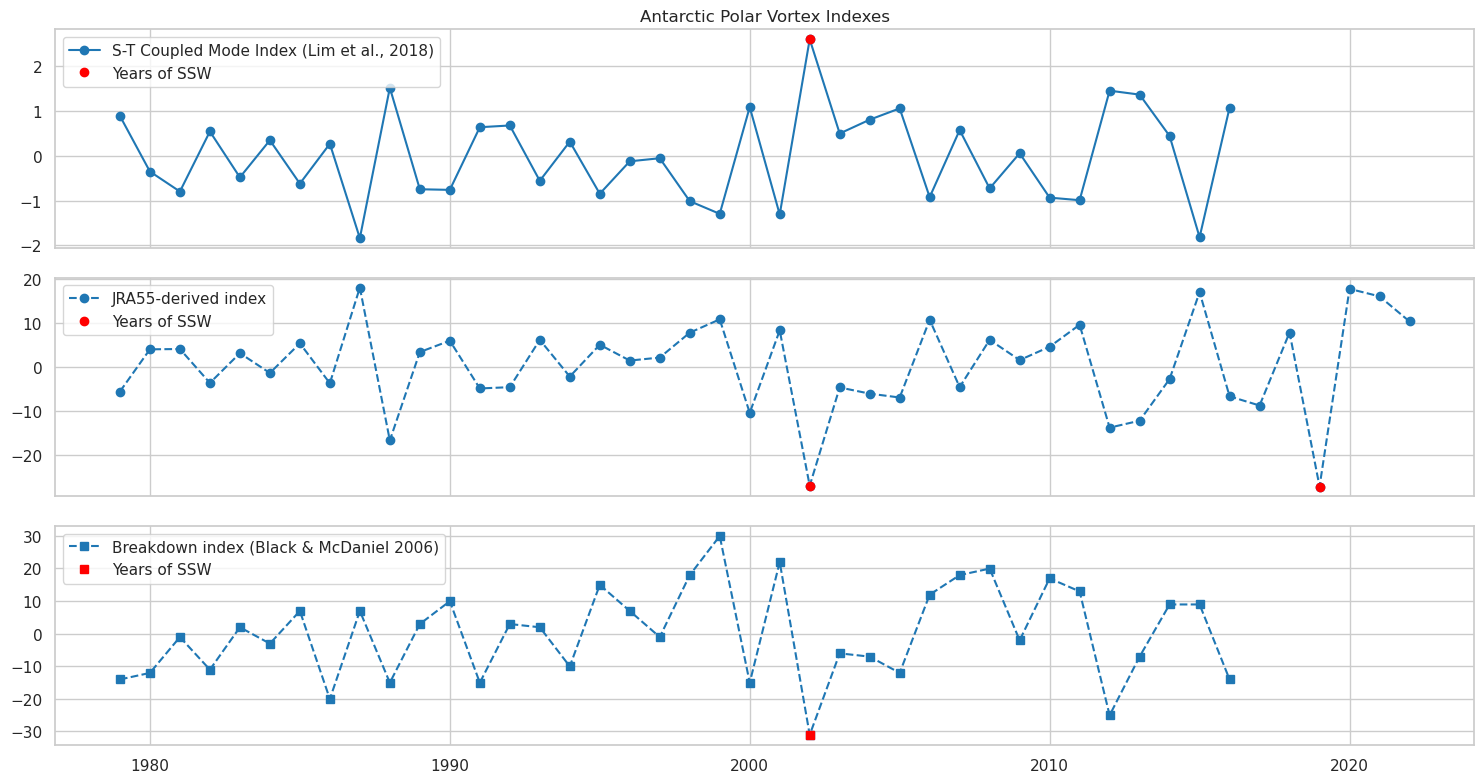

In [8]:
### Set style
sns.set(style='whitegrid')

# Create a figure with two subplots
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(15, 8), sharex=True)

# Define colors and line styles
line_color = 'tab:blue'
line_style_column2 = '-'
line_style_column3 = '--'

# Plot the first column (years) and second column (S-Tmode_Lim_et_al_2018)
ax1.plot(data['Year'], data['S-Tmode_Lim_et_al_2018'], marker='o', linestyle=line_style_column2, color=line_color, label='S-T Coupled Mode Index (Lim et al., 2018)')
#ax1.scatter(data[data['Year'].isin([2002, 2019])]['Year'], data[data['Year'].isin([2002, 2019])]['S-Tmode_Lim_et_al_2018'], marker='o', edgecolor='red', facecolor='red', s=60, label='Years of SSW')
ax1.plot(data[data['Year'].isin([2002, 2019])]['Year'], data[data['Year'].isin([2002, 2019])]['S-Tmode_Lim_et_al_2018'], marker='o', linestyle='None', color='red', markersize=6, label='Years of SSW')
ax1.set_ylabel('')
ax1.set_title('Antarctic Polar Vortex Indexes')
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot the third column (replace 'Column_3' with the actual column name)
ax2.plot(data['Year'], data['Sep-Nov[U]_60S10hPa_JRA55'], marker='o', linestyle=line_style_column3, color=line_color, label='JRA55-derived index')
ax2.plot(data[data['Year'].isin([2002, 2019])]['Year'], data[data['Year'].isin([2002, 2019])]['Sep-Nov[U]_60S10hPa_JRA55'], marker='o', linestyle='None', color='red', markersize=6,label='Years of SSW')
ax2.set_ylabel('')
ax2.legend()
ax2.grid(True)

# Plot the third column (replace 'Column_3' with the actual column name)
ax3.plot(data2['Year'], data2['Index'], marker='s', linestyle=line_style_column3, color=line_color, label='Breakdown index (Black & McDaniel 2006)')
ax3.plot(data2[data2['Year'].isin([2002])]['Year'], data2[data2['Year'].isin([2002])]['Index'], marker='s', linestyle='None', color='red', markersize=6,label='Years of SSW')
ax3.set_ylabel('')
ax3.legend(loc="upper left")
ax3.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Specify the folder path
output_folder = '/home/jovyan/ohw23_proj_SAupwelling/Figures/'

# Save the figure to the specified folder
fig.savefig(os.path.join(output_folder, 'PV_index_timeseries.png'), dpi=300, bbox_inches='tight')



In [41]:
### PREP DATA SET FOR CORRELATIONS	
STmode_id = data[['Year', 'S-Tmode_Lim_et_al_2018']]
JRA_id = data[['Year', 'Sep-Nov[U]_60S10hPa_JRA55']]
BD_id =data2[['Year', 'Index']]


### LOAD THE MOORING TIME SERIES DATA 

In [109]:
file_path = '/home/jovyan/ohw23_proj_SAupwelling/Datasets/NRSKAI_TEMP_101-111m.csv'
NRSKAI = pd.read_csv(file_path)

file_path = '/home/jovyan/ohw23_proj_SAupwelling/Datasets/SAM2CP_TEMP_90-100m.csv'
SAM2CP = pd.read_csv(file_path)

file_path = '/home/jovyan/ohw23_proj_SAupwelling/Datasets/SAM3MS_TEMP_158-168m.csv'
SAM3MS = pd.read_csv(file_path)

file_path = '/home/jovyan/ohw23_proj_SAupwelling/Datasets/SAM5CB_TEMP_90-100m.csv'
SAM5CB = pd.read_csv(file_path)

file_path = '/home/jovyan/ohw23_proj_SAupwelling/Datasets/SAM6IS_TEMP_73-83m.csv'
SAM6IS = pd.read_csv(file_path)

file_path = '/home/jovyan/ohw23_proj_SAupwelling/Datasets/SAM7DS_TEMP_512-522m.csv'
SAM7DS = pd.read_csv(file_path)

file_path = '/home/jovyan/ohw23_proj_SAupwelling/Datasets/SAM8SG_TEMP_38-48m.csv'
SAM8SG = pd.read_csv(file_path)

In [110]:
# Convert 'TIME' column to datetime format
NRSKAI['TIME'] = pd.to_datetime(NRSKAI['TIME'])
SAM8SG['TIME'] = pd.to_datetime(NRSKAI['TIME'])
SAM5CB['TIME'] = pd.to_datetime(NRSKAI['TIME'])

In [111]:
#Calculate yearly means for correlation
NRSKAI["Year"] = NRSKAI['TIME'].dt.year
NRS_yr = NRSKAI.groupby("Year").mean()

SAM8SG["Year"] = SAM8SG['TIME'].dt.year
SAM8SG_yr = SAM8SG.groupby("Year").mean()

SAM5CB["Year"] = SAM5CB['TIME'].dt.year
SAM5CB_yr = SAM5CB.groupby("Year").mean()

## this is good  for later
#Resample to calculate means
#SAM8SG_day = SAM8SG.resample('D').mean()
#SAM8SG_mth = SAM8SG.resample('M').mean()
#SAM8SG_yr = SAM8SG.resample('Y').mean()

#Resample to calculate means
#SAM5CB_day = SAM8SG.resample('D').mean()
#SAM5CB_mth = SAM8SG.resample('M').mean()
#SAM5CB_yr = SAM8SG.resample('Y').mean()

/tmp/ipykernel_2249/947430061.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NRS_yr = NRSKAI.groupby("Year").mean()
/tmp/ipykernel_2249/947430061.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  SAM8SG_yr = SAM8SG.groupby("Year").mean()
/tmp/ipykernel_2249/947430061.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  SAM5CB_yr = SAM5CB.groupby("Year").mean()


### Detrend the time series and apply a 12-month rolling mean on the data to remove climatology

### Create the correlations

In [133]:
# Merge or join DataFrames based on index (year) to do the correlations
NRS_STmode = NRS_yr.merge(STmode_id, how='inner', on='Year')
SAM8SG_STmode =SAM8SG_yr.merge(STmode_id, how='inner', on='Year')
SAM5CB_STmode =SAM5CB_yr.merge(STmode_id, how='inner', on='Year')

NRS_JRA = NRS_yr.merge(JRA_id, how='inner', on='Year')
SAM8SG_JRA =SAM8SG_yr.merge(JRA_id, how='inner', on='Year')
SAM5CB_JRA =SAM5CB_yr.merge(JRA_id, how='inner', on='Year')

NRS_BD = NRS_yr.merge(BD_id, how='inner', on='Year')
SAM8SG_BD =SAM8SG_yr.merge(BD_id, how='inner', on='Year')
SAM5CB_BD =SAM5CB_yr.merge(BD_id, how='inner', on='Year')


In [134]:
# Create a dictionary to store DataFrames
dataframes = {
    'NRS_STmode': NRS_STmode,
    'SAM8SG_STmode': SAM8SG_STmode,
    'SAM5CB_STmode': SAM5CB_STmode,
    'NRS_JRA': NRS_JRA,
    'SAM8SG_JRA': SAM8SG_JRA,
    'SAM5CB_JRA': SAM5CB_JRA,
    'NRS_BD': NRS_BD,
    'SAM8SG_BD': SAM8SG_BD,
    'SAM5CB_BD': SAM5CB_BD,
}

# Loop through the dictionary of DataFrames
for df_name, df in dataframes.items():
    # Set 'Year' as the index
    df.set_index('Year', inplace=True)
    
    # Drop the 'DEPTH' column
    df.drop('DEPTH', axis=1, inplace=True)
    
    # Print the processed DataFrame
    print(f"Processed DataFrame {df_name}:\n{df}\n{'-'*40}")


Processed DataFrame NRS_STmode:
           TEMP  S-Tmode_Lim_et_al_2018
Year                                   
2008  15.101313               -0.726863
2009  15.817834                0.055961
2010  14.671818               -0.933752
2011  15.677293               -0.991039
2012  16.024390                1.451725
2013  15.705813                1.364108
2014  14.984973                0.441773
2015  15.639833               -1.816639
2016  14.914560                1.072356
2017  15.220976                     NaN
2018  15.555750                     NaN
2019  15.435438                     NaN
2020  15.037782                     NaN
2021  15.405807                     NaN
2022  14.951490                     NaN
----------------------------------------
Processed DataFrame SAM8SG_STmode:
             TEMP  S-Tmode_Lim_et_al_2018
Year                                     
2008.0  15.901619               -0.726863
2009.0  15.138168                0.055961
2010.0  16.362095               -0.933752
20

In [ ]:
# calculate the correlations

In [137]:
# Calculate Pearson correlation coefficient
pearson_NRS_ST = NRS_STmode.corr()
pearson_NRS_JRA = NRS_JRA.corr()
pearson_NRS_BD = NRS_BD.corr()

print(pearson_NRS_ST)
print(pearson_NRS_JRA)
print(pearson_NRS_BD)

pearson_SAM8_ST = SAM8SG_STmode.corr()
pearson_SAM8_JRA = SAM8SG_JRA.corr()
pearson_SAM8_BD = SAM8SG_BD.corr()

print(pearson_SAM8_ST)
print(pearson_SAM8_JRA)
print(pearson_SAM8_BD)

pearson_SAM5_ST = SAM5CB_STmode.corr()
pearson_SAM5_JRA = SAM5CB_JRA.corr()
pearson_SAM5_BD = SAM5CB_BD.corr()

print(pearson_SAM5_ST)
print(pearson_SAM5_JRA)
print(pearson_SAM5_BD)

# Calculate Spearman correlation coefficient
spearman_NRS_ST = NRS_STmode.corr(method='spearman')
spearman_NRS_JRA = NRS_JRA.corr(method='spearman')
spearman_NRS_BD = NRS_BD.corr(method='spearman')

print(spearman_NRS_ST)
print(spearman_NRS_JRA)
print(spearman_NRS_BD)

spearman_SAM8_ST = SAM8SG_STmode.corr(method='spearman')
spearman_SAM8_JRA = SAM8SG_JRA.corr(method='spearman')
spearman_SAM8_BD = SAM8SG_BD.corr(method='spearman')

print(spearman_SAM8_ST)
print(spearman_SAM8_JRA)
print(spearman_SAM8_BD)

spearman_SAM5_ST = SAM5CB_STmode.corr(method='spearman')
spearman_SAM5_JRA = SAM5CB_JRA.corr(method='spearman')
spearman_SAM5_BD = SAM5CB_BD.corr(method='spearman')

print(spearman_SAM5_ST)
print(spearman_SAM5_JRA)
print(spearman_SAM5_BD)

# Calculate Kendall correlation coefficient
kendall_NRS_ST = NRS_STmode.corr(method='kendall')
kendall_NRS_JRA = NRS_JRA.corr(method='kendall')
kendall_NRS_BD = NRS_BD.corr(method='kendall')

print(kendall_NRS_ST)
print(kendall_NRS_JRA)
print(kendall_NRS_BD)

kendall_SAM8_ST = SAM8SG_STmode.corr(method='kendall')
kendall_SAM8_JRA = SAM8SG_JRA.corr(method='kendall')
kendall_SAM8_BD = SAM8SG_BD.corr(method='kendall')

print(kendall_SAM8_ST)
print(kendall_SAM8_JRA)
print(kendall_SAM8_BD)

kendall_SAM5_ST = SAM5CB_STmode.corr(method='kendall')
kendall_SAM5_JRA = SAM5CB_JRA.corr(method='kendall')
kendall_SAM5_BD = SAM5CB_BD.corr(method='kendall')

print(kendall_SAM5_ST)
print(kendall_SAM5_JRA)
print(kendall_SAM5_BD)

                            TEMP  S-Tmode_Lim_et_al_2018
TEMP                    1.000000                0.185338
S-Tmode_Lim_et_al_2018  0.185338                1.000000
                               TEMP  Sep-Nov[U]_60S10hPa_JRA55
TEMP                       1.000000                  -0.192977
Sep-Nov[U]_60S10hPa_JRA55 -0.192977                   1.000000
           TEMP     Index
TEMP   1.000000 -0.482288
Index -0.482288  1.000000
                            TEMP  S-Tmode_Lim_et_al_2018
TEMP                    1.000000                0.574519
S-Tmode_Lim_et_al_2018  0.574519                1.000000
                              TEMP  Sep-Nov[U]_60S10hPa_JRA55
TEMP                       1.00000                   -0.35912
Sep-Nov[U]_60S10hPa_JRA55 -0.35912                    1.00000
           TEMP     Index
TEMP   1.000000 -0.513916
Index -0.513916  1.000000
                            TEMP  S-Tmode_Lim_et_al_2018
TEMP                    1.000000                0.408807
S-Tmode_Lim_e

## FROM HERE 
- Redo when spike is removed. 
- Re-calculate the indexes monthly (that involves actually reading the paper). 
- Recalculate the correlations using monthly indexes. In this case I'll have to detred and probably pass a 12 month rolling mean through it.

### Create plots for the time series overlapped. Example code to be tweaked below. It is written for xarray.  